In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
from matplotlib import cm
import dask
import pickle

In [67]:
rcp85 = pickle.load( open("rcp85_dic.p", "rb"))
hist =  pickle.load( open("hist_dic.p", "rb"))

In [68]:
avail_models  = [model for model in hist.keys() if model in rcp85.keys()]

results = pd.read_csv('../../scores/results.csv').set_index('Model')
final_models = [i for i in results.index if i in avail_models]

winners = ['MIROC-ESM-CHEM','BNU-ESM','CNRM-CM5','GFDL-ESM2M','bcc-csm1-1','ACCESS1-0']
winners = [i for i in winners if i in final_models]

In [111]:
def get_mean(dic):
    return (dic['JJA']+dic['SON']+dic['MAM']+dic['DJF'])/4

In [129]:
win = 0
for model in winners:
    win = win + (get_mean(rcp85[model]) - get_mean(hist[model]))
    
win = win / len(winners)

full = 0
for model in final_models:
    full = full + (get_mean(rcp85[model]) - get_mean(hist[model]))
    
full = full / len(final_models)

avail = 0
for model in avail_models:
    avail = avail + (get_mean(rcp85[model]) - get_mean(hist[model]))
    
avail = avail / len(avail_models)

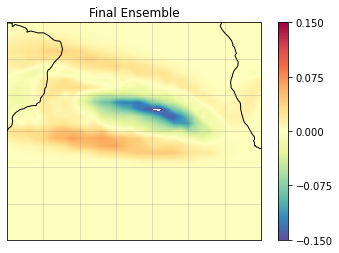

In [113]:
levels = np.linspace(-0.15,0.15, 1100)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.rcParams['hatch.linewidth']=0.4
plt.rcParams['hatch.color']='black'
c = ax.contourf(win.lon,win.lat,win,cmap='Spectral_r',transform = ccrs.PlateCarree(), levels = levels)
plt.title('Final Ensemble')
plt.colorbar(c, ticks=[-0.15,-0.075, 0, 0.075, 0.15])
ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)

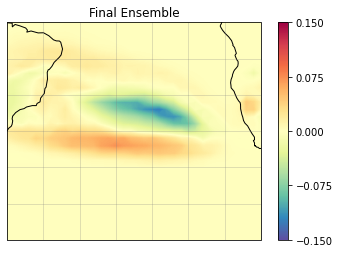

In [114]:
levels = np.linspace(-0.15,0.15, 1100)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.rcParams['hatch.linewidth']=0.4
plt.rcParams['hatch.color']='black'
c = ax.contourf(win.lon,win.lat,full,cmap='Spectral_r',transform = ccrs.PlateCarree(),levels = levels)
plt.title('Final Ensemble')
plt.colorbar(c, ticks=[-0.15,-0.075, 0, 0.075, 0.15])
ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)

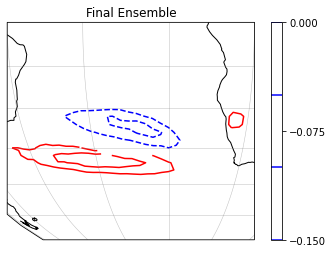

In [135]:
levels = np.linspace(-0.15,0.15, 1100)

ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()
plt.rcParams['hatch.linewidth']=0.4
plt.rcParams['hatch.color']='black'
c = ax.contour(win.lon,win.lat,full.where(full > 0),colors='Red',transform = ccrs.PlateCarree(),levels = 2)
c = ax.contour(win.lon,win.lat,full.where(full < 0),colors='Blue',transform = ccrs.PlateCarree(),levels = 2)
plt.title('Final Ensemble')
plt.colorbar(c, ticks=[-0.15,-0.075, 0, 0.075, 0.15])
ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)
ax.set_extent([-40, 20, -60, 0], ccrs.PlateCarree())

In [116]:
win = 0
for model in winners:
    win = win + get_mean(rcp85[model])
    
rcp85_win = win / len(winners)

full = 0
for model in final_models:
    full = full + get_mean(rcp85[model]) 
    
rcp85_full = full / len(final_models)

In [120]:
model = 'ACCESS1-0'

In [121]:
win = 0
for model in winners:
    win = win + get_mean(hist[model])
    
hist_win = win / len(winners)

full = 0
for model in final_models:
    full = full + get_mean(hist[model]) 
    
hist_full = full / len(final_models)

In [122]:
def contourise(x):
    limit = 0.35
    x = x.where((x>=limit))
    x = x/x
    x = x.fillna(0)
    return x

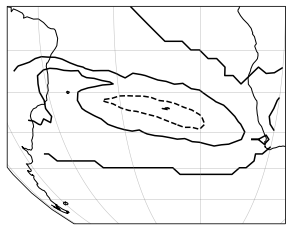

In [127]:
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()

ax.contour(hist_full.lon,hist_full.lat,rcp85_win - hist_win,colors = 'black', transform = ccrs.PlateCarree(),alpha=1, levels = 2)


ax.set_extent([-50, 20, -60, 0], ccrs.PlateCarree())
ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)